In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.2f}'.format)

/home/srijan/.local/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### LOADING DATASETS

In [2]:
fundamentals = pd.read_csv("fundamentals.csv")
fundamentals.head()   

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3068000000.00,-222000000.00,-1961000000.00,23.00,-1888000000.00,4695000000.00,53.00,...,7072000000.00,9011000000.00,-7987000000.00,24891000000.00,16904000000.00,24855000000.00,-367000000.00,2012.00,-5.60,335000000.00
1,1,AAL,2013-12-31,4975000000.00,-93000000.00,-2723000000.00,67.00,-3114000000.00,10592000000.00,75.00,...,14323000000.00,13806000000.00,-2731000000.00,45009000000.00,42278000000.00,26743000000.00,0.00,2013.00,-11.25,163022222.22
2,2,AAL,2014-12-31,4668000000.00,-160000000.00,-150000000.00,143.00,-5311000000.00,15135000000.00,60.00,...,11750000000.00,13404000000.00,2021000000.00,41204000000.00,43225000000.00,42650000000.00,0.00,2014.00,4.02,716915422.89
3,3,AAL,2015-12-31,5102000000.00,352000000.00,-708000000.00,135.00,-6151000000.00,11591000000.00,51.00,...,9985000000.00,13605000000.00,5635000000.00,42780000000.00,48415000000.00,40990000000.00,0.00,2015.00,11.39,668129938.54
4,4,AAP,2012-12-29,2409453000.00,-89482000.00,600000.00,32.00,-271182000.00,520215000.00,23.00,...,3184200000.00,2559638000.00,1210694000.00,3403120000.00,4613814000.00,6205003000.00,-27095000.00,2012.00,5.29,73283553.88


In [3]:
price_split= pd.read_csv("prices-split-adjusted.csv")
price_split.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.43,125.84,122.31,126.25,2163600.00
1,2016-01-06,WLTW,125.24,119.98,119.94,125.54,2386400.00
2,2016-01-07,WLTW,116.38,114.95,114.93,119.74,2489500.00
3,2016-01-08,WLTW,115.48,116.62,113.50,117.44,2006300.00
4,2016-01-11,WLTW,117.01,114.97,114.09,117.33,1408600.00


In [4]:
prices=pd.read_csv("prices.csv")
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.43,125.84,122.31,126.25,2163600.00
1,2016-01-06 00:00:00,WLTW,125.24,119.98,119.94,125.54,2386400.00
2,2016-01-07 00:00:00,WLTW,116.38,114.95,114.93,119.74,2489500.00
3,2016-01-08 00:00:00,WLTW,115.48,116.62,113.50,117.44,2006300.00
4,2016-01-11 00:00:00,WLTW,117.01,114.97,114.09,117.33,1408600.00


In [5]:
securities=pd.read_csv("securities.csv")
securities.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


### ANALYSING AND CLEANING DATASETS SEPARATELY

#### 1. Fundamentals

In [6]:
fundamentals.head(7)

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3068000000.00,-222000000.00,-1961000000.00,23.00,-1888000000.00,4695000000.00,53.00,...,7072000000.00,9011000000.00,-7987000000.00,24891000000.00,16904000000.00,24855000000.00,-367000000.00,2012.00,-5.60,335000000.00
1,1,AAL,2013-12-31,4975000000.00,-93000000.00,-2723000000.00,67.00,-3114000000.00,10592000000.00,75.00,...,14323000000.00,13806000000.00,-2731000000.00,45009000000.00,42278000000.00,26743000000.00,0.00,2013.00,-11.25,163022222.22
2,2,AAL,2014-12-31,4668000000.00,-160000000.00,-150000000.00,143.00,-5311000000.00,15135000000.00,60.00,...,11750000000.00,13404000000.00,2021000000.00,41204000000.00,43225000000.00,42650000000.00,0.00,2014.00,4.02,716915422.89
3,3,AAL,2015-12-31,5102000000.00,352000000.00,-708000000.00,135.00,-6151000000.00,11591000000.00,51.00,...,9985000000.00,13605000000.00,5635000000.00,42780000000.00,48415000000.00,40990000000.00,0.00,2015.00,11.39,668129938.54
4,4,AAP,2012-12-29,2409453000.00,-89482000.00,600000.00,32.00,-271182000.00,520215000.00,23.00,...,3184200000.00,2559638000.00,1210694000.00,3403120000.00,4613814000.00,6205003000.00,-27095000.00,2012.00,5.29,73283553.88
5,5,AAP,2013-12-28,2609239000.00,-32428000.00,2698000.00,26.00,-195757000.00,531293000.00,40.00,...,3989384000.00,2764785000.00,1516205000.00,4048569000.00,5564774000.00,6493814000.00,-107890000.00,2013.00,5.36,73089179.10
6,6,AAP,2015-01-03,3616038000.00,-48209000.00,3092000.00,25.00,-228446000.00,562945000.00,3.00,...,4741040000.00,3654416000.00,2002912000.00,5959446000.00,7962358000.00,9843861000.00,-113044000.00,2014.00,6.75,73159259.26


In [7]:
# we notice an extra unnamed column which can be removed
fundamentals.columns.str.match("Unnamed")
fundamentals=fundamentals.loc[:,~fundamentals.columns.str.match("Unnamed")]
fundamentals.head()

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3068000000.00,-222000000.00,-1961000000.00,23.00,-1888000000.00,4695000000.00,53.00,1330000000.00,...,7072000000.00,9011000000.00,-7987000000.00,24891000000.00,16904000000.00,24855000000.00,-367000000.00,2012.00,-5.60,335000000.00
1,AAL,2013-12-31,4975000000.00,-93000000.00,-2723000000.00,67.00,-3114000000.00,10592000000.00,75.00,2175000000.00,...,14323000000.00,13806000000.00,-2731000000.00,45009000000.00,42278000000.00,26743000000.00,0.00,2013.00,-11.25,163022222.22
2,AAL,2014-12-31,4668000000.00,-160000000.00,-150000000.00,143.00,-5311000000.00,15135000000.00,60.00,1768000000.00,...,11750000000.00,13404000000.00,2021000000.00,41204000000.00,43225000000.00,42650000000.00,0.00,2014.00,4.02,716915422.89
3,AAL,2015-12-31,5102000000.00,352000000.00,-708000000.00,135.00,-6151000000.00,11591000000.00,51.00,1085000000.00,...,9985000000.00,13605000000.00,5635000000.00,42780000000.00,48415000000.00,40990000000.00,0.00,2015.00,11.39,668129938.54
4,AAP,2012-12-29,2409453000.00,-89482000.00,600000.00,32.00,-271182000.00,520215000.00,23.00,598111000.00,...,3184200000.00,2559638000.00,1210694000.00,3403120000.00,4613814000.00,6205003000.00,-27095000.00,2012.00,5.29,73283553.88


In [8]:
fundamentals.shape

(1781, 78)

In [9]:
fundamentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Ticker Symbol                                        1781 non-null   object 
 1   Period Ending                                        1781 non-null   object 
 2   Accounts Payable                                     1781 non-null   float64
 3   Accounts Receivable                                  1781 non-null   float64
 4   Add'l income/expense items                           1781 non-null   float64
 5   After Tax ROE                                        1781 non-null   float64
 6   Capital Expenditures                                 1781 non-null   float64
 7   Capital Surplus                                      1781 non-null   float64
 8   Cash Ratio                                           1482 non-null  

In [10]:
fundamentals.describe()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1482.00,1781.00,1781.00,1781.00,...,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1608.00,1562.00,1562.00
mean,4673417755.76,-63534842.22,69089399.21,43.60,-1251924663.11,5351783833.24,74.46,8521399416.06,-67877487.37,1608543028.64,...,6726348593.49,4699918938.80,11888455635.60,43804202904.55,55692658540.15,20291543427.85,-3951522290.29,2013.31,3.35,602424367.65
std,14060472820.10,756279433.68,684814332.32,233.92,2979962962.67,11339771504.63,102.30,54321046048.25,390336885.93,9177635746.11,...,13448000447.72,9538832077.25,25844289612.86,181703864897.77,203361247941.49,40953552282.36,14070468017.89,19.95,4.70,1142584658.62
min,0.00,-6452000000.00,-6768000000.00,0.00,-37985000000.00,-721500000.00,0.00,21000.00,-5562000000.00,0.00,...,0.00,0.00,-13244000000.00,2577000.00,2705000.00,1514000.00,-229734000000.00,1215.00,-61.20,-1513945000.00
25%,516000000.00,-104000000.00,-2638000.00,10.00,-1151200000.00,479100000.00,17.00,308800000.00,-54000000.00,1628000.00,...,1044178000.00,564076000.00,2201492000.00,3843300000.00,6552689000.00,3714000000.00,-3040895000.00,2013.00,1.59,149331761.19
50%,1334000000.00,-18300000.00,2000000.00,16.00,-358000000.00,1997080000.00,41.00,862590000.00,0.00,7725000.00,...,2747200000.00,1701500000.00,4983000000.00,9141000000.00,15170000000.00,8023200000.00,-306835000.00,2014.00,2.81,292940893.61
75%,3246000000.00,7816000.00,33592000.00,26.00,-129100000.00,5735000000.00,90.00,2310000000.00,0.00,297000000.00,...,6162000000.00,4381000000.00,10809000000.00,23897000000.00,35997100000.00,17486000000.00,0.00,2015.00,4.59,549216251.59
max,206939000000.00,22664000000.00,14162000000.00,5789.00,5000000.00,108288000000.00,1041.00,728111000000.00,3755000000.00,158142000000.00,...,139660000000.00,90281000000.00,256205000000.00,2340547000000.00,2572274000000.00,485651000000.00,0.00,2016.00,50.09,16107692307.70


In [11]:
#it is an unusual min value for year
fundamentals["For Year"].describe()

count   1608.00
mean    2013.31
std       19.95
min     1215.00
25%     2013.00
50%     2014.00
75%     2015.00
max     2016.00
Name: For Year, dtype: float64

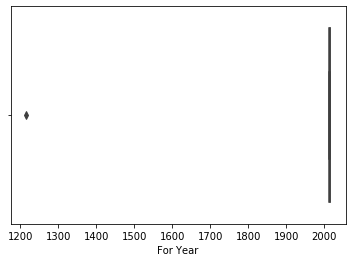

In [12]:
# outliers of "for year" suggest that there is only one outlier which is the value 1250
ax = sns.boxplot(x=fundamentals["For Year"])

In [13]:
fundamentals.loc[fundamentals['For Year'] == 1215, 'For Year'] = 2015
fundamentals

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3068000000.00,-222000000.00,-1961000000.00,23.00,-1888000000.00,4695000000.00,53.00,1330000000.00,...,7072000000.00,9011000000.00,-7987000000.00,24891000000.00,16904000000.00,24855000000.00,-367000000.00,2012.00,-5.60,335000000.00
1,AAL,2013-12-31,4975000000.00,-93000000.00,-2723000000.00,67.00,-3114000000.00,10592000000.00,75.00,2175000000.00,...,14323000000.00,13806000000.00,-2731000000.00,45009000000.00,42278000000.00,26743000000.00,0.00,2013.00,-11.25,163022222.22
2,AAL,2014-12-31,4668000000.00,-160000000.00,-150000000.00,143.00,-5311000000.00,15135000000.00,60.00,1768000000.00,...,11750000000.00,13404000000.00,2021000000.00,41204000000.00,43225000000.00,42650000000.00,0.00,2014.00,4.02,716915422.89
3,AAL,2015-12-31,5102000000.00,352000000.00,-708000000.00,135.00,-6151000000.00,11591000000.00,51.00,1085000000.00,...,9985000000.00,13605000000.00,5635000000.00,42780000000.00,48415000000.00,40990000000.00,0.00,2015.00,11.39,668129938.54
4,AAP,2012-12-29,2409453000.00,-89482000.00,600000.00,32.00,-271182000.00,520215000.00,23.00,598111000.00,...,3184200000.00,2559638000.00,1210694000.00,3403120000.00,4613814000.00,6205003000.00,-27095000.00,2012.00,5.29,73283553.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,ZION,2015-12-31,0.00,0.00,-2530000.00,4.00,-157361000.00,0.00,NaN,15763133000.00,...,0.00,0.00,7507519000.00,52162006000.00,59669525000.00,2210591000.00,0.00,2015.00,1.20,257892500.00
1777,ZTS,2013-12-31,1381000000.00,-99000000.00,9000000.00,54.00,-184000000.00,878000000.00,43.00,610000000.00,...,3357000000.00,1415000000.00,940000000.00,5618000000.00,6558000000.00,4561000000.00,0.00,2013.00,1.01,499009900.99
1778,ZTS,2014-12-31,1071000000.00,69000000.00,-7000000.00,44.00,-180000000.00,958000000.00,81.00,882000000.00,...,3465000000.00,1086000000.00,1311000000.00,5277000000.00,6588000000.00,4785000000.00,0.00,2014.00,1.16,502586206.90
1779,ZTS,2015-12-31,1313000000.00,-58000000.00,-81000000.00,32.00,-224000000.00,1012000000.00,65.00,1154000000.00,...,3830000000.00,1781000000.00,1068000000.00,6845000000.00,7913000000.00,4765000000.00,-203000000.00,2015.00,0.68,498529411.76


In [14]:
# now the min value is appropriate
fundamentals.describe()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1482.00,1781.00,1781.00,1781.00,...,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1608.00,1562.00,1562.00
mean,4673417755.76,-63534842.22,69089399.21,43.60,-1251924663.11,5351783833.24,74.46,8521399416.06,-67877487.37,1608543028.64,...,6726348593.49,4699918938.80,11888455635.60,43804202904.55,55692658540.15,20291543427.85,-3951522290.29,2013.80,3.35,602424367.65
std,14060472820.10,756279433.68,684814332.32,233.92,2979962962.67,11339771504.63,102.30,54321046048.25,390336885.93,9177635746.11,...,13448000447.72,9538832077.25,25844289612.86,181703864897.77,203361247941.49,40953552282.36,14070468017.89,1.14,4.70,1142584658.62
min,0.00,-6452000000.00,-6768000000.00,0.00,-37985000000.00,-721500000.00,0.00,21000.00,-5562000000.00,0.00,...,0.00,0.00,-13244000000.00,2577000.00,2705000.00,1514000.00,-229734000000.00,2012.00,-61.20,-1513945000.00
25%,516000000.00,-104000000.00,-2638000.00,10.00,-1151200000.00,479100000.00,17.00,308800000.00,-54000000.00,1628000.00,...,1044178000.00,564076000.00,2201492000.00,3843300000.00,6552689000.00,3714000000.00,-3040895000.00,2013.00,1.59,149331761.19
50%,1334000000.00,-18300000.00,2000000.00,16.00,-358000000.00,1997080000.00,41.00,862590000.00,0.00,7725000.00,...,2747200000.00,1701500000.00,4983000000.00,9141000000.00,15170000000.00,8023200000.00,-306835000.00,2014.00,2.81,292940893.61
75%,3246000000.00,7816000.00,33592000.00,26.00,-129100000.00,5735000000.00,90.00,2310000000.00,0.00,297000000.00,...,6162000000.00,4381000000.00,10809000000.00,23897000000.00,35997100000.00,17486000000.00,0.00,2015.00,4.59,549216251.59
max,206939000000.00,22664000000.00,14162000000.00,5789.00,5000000.00,108288000000.00,1041.00,728111000000.00,3755000000.00,158142000000.00,...,139660000000.00,90281000000.00,256205000000.00,2340547000000.00,2572274000000.00,485651000000.00,0.00,2016.00,50.09,16107692307.70


In [15]:
# adding missing values and/or deleting columns
fundamentals[fundamentals.columns[fundamentals.isna().any()]]
# the columns with missing values are- cash ratio, current ratio, 
# quick ratio, for year, earnings per share, estimated shares outstanding

,Cash Ratio,Current Ratio,Quick Ratio,For Year,Earnings Per Share,Estimated Shares Outstanding
0,53.00,78.00,72.00,2012.00,-5.60,335000000.00
1,75.00,104.00,96.00,2013.00,-11.25,163022222.22
2,60.00,88.00,80.00,2014.00,4.02,716915422.89
3,51.00,73.00,67.00,2015.00,11.39,668129938.54
4,23.00,124.00,34.00,2012.00,5.29,73283553.88
...,...,...,...,...,...,...
1776,NaN,NaN,NaN,2015.00,1.20,257892500.00
1777,43.00,237.00,146.00,2013.00,1.01,499009900.99
1778,81.00,319.00,200.00,2014.00,1.16,502586206.90
1779,65.00,215.00,133.00,2015.00,0.68,498529411.76


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


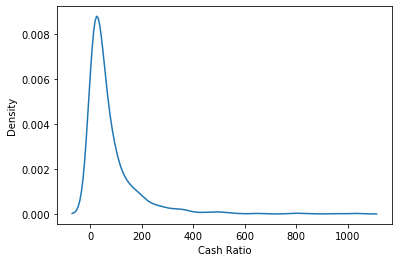

In [16]:
sns.kdeplot(data=fundamentals,x="Cash Ratio")
# sns.kdeplot(data=fundamentals,x="Current Ratio")
# sns.kdeplot(data=fundamentals,x="Quick Ratio")
# sns.kdeplot(data=fundamentals,x="Estimated Shares Outstanding")
# sns.kdeplot(data=fundamentals,x="Earnings Per Share")

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


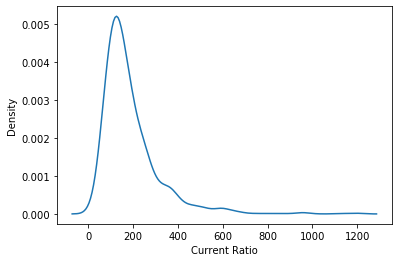

In [17]:
sns.kdeplot(data=fundamentals,x="Current Ratio")

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


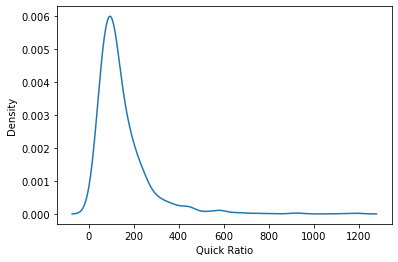

In [18]:
sns.kdeplot(data=fundamentals,x="Quick Ratio")

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


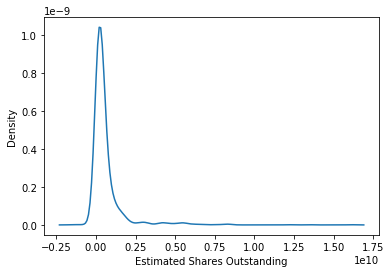

In [19]:
sns.kdeplot(data=fundamentals,x="Estimated Shares Outstanding")

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


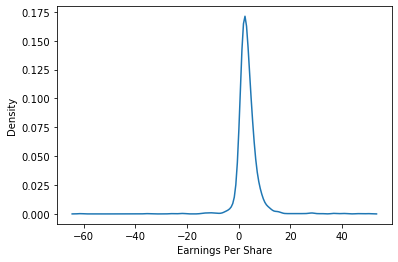

In [20]:
sns.kdeplot(data=fundamentals,x="Earnings Per Share")

we are getting positively skewed distribution but it is extremely skewed so we'll perform grouped mean

In [21]:
# in the earlier cell we can see that the amount of missing data is less than 20% of the total values
# this situation can be dealt by filling na values by grouped mean

In [22]:
fundamentals.groupby('Ticker Symbol').mean()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
Ticker Symbol,,,,,,,,,,,,,,,,,,,,,
AAL,4453250000.00,-30750000.00,-1385500000.00,92.00,-4116000000.00,10503250000.00,59.75,1589500000.00,0.00,36250000.00,...,10782500000.00,12456500000.00,-765500000.00,38471000000.00,37705500000.00,33809500000.00,-91750000.00,2013.50,-0.36,470766895.91
AAP,3097953750.00,-47898750.00,-273500.00,25.50,-232533000.00,554446250.00,17.00,476508750.00,-233891000.00,7000.00,...,4213842500.00,3194079000.00,1797614750.00,4771263000.00,6568877750.00,8069924000.00,-91934500.00,2013.50,5.96,73231757.75
AAPL,51216000000.00,-2620250000.00,1192250000.00,36.50,-10429250000.00,0.00,67.50,17426750000.00,-267500000.00,25436000000.00,...,84516000000.00,66680500000.00,120675000000.00,142042500000.00,262717500000.00,200764750000.00,0.00,2014.50,16.04,4559554825.65
ABBV,6899750000.00,-86000000.00,-229750000.00,457.75,-492000000.00,5236250000.00,103.25,8060750000.00,-224000000.00,12250000.00,...,16399250000.00,8985500000.00,2457250000.00,31735000000.00,34192250000.00,19997250000.00,-2532750000.00,2014.00,2.28,1610404690.41
ABC,19592295250.00,-1410580250.00,-16952500.00,30.50,-290777000.00,3294913750.00,9.75,1987198250.00,-1319395500.00,2729250.00,...,18595047750.00,19745082500.00,1755608500.00,23761892250.00,25517500750.00,122584945750.00,-3094310250.00,2014.50,2.30,222623593.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YHOO,1840122000.00,12791000.00,3793449250.00,17.75,-453915000.00,8889600000.00,303.50,2260344250.00,0.00,1026500.00,...,6907577500.00,2105726750.00,23855120750.00,11349757750.00,35204878500.00,4813345000.00,-798064750.00,2013.50,1.90,1042707811.33
YUM,2192500000.00,-26250000.00,0.00,83.50,-1038500000.00,0.00,31.25,773500000.00,15750000.00,0.00,...,1714250000.00,2510250000.00,1694500000.00,6834750000.00,8529250000.00,13275250000.00,0.00,2013.50,2.80,448267810.01
ZBH,307975000.00,-54075000.00,-9275000.00,9.25,-333225000.00,5006800000.00,155.25,1126875000.00,-146400000.00,2725000.00,...,4520650000.00,1134875000.00,7149000000.00,6718625000.00,13867625000.00,4941550000.00,-5842650000.00,2013.50,3.46,176530756.82


In [23]:
fundamentals.groupby(["Ticker Symbol"]).median()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
Ticker Symbol,,,,,,,,,,,,,,,,,,,,,
AAL,4821500000.00,-126500000.00,-1334500000.00,101.00,-4212500000.00,11091500000.00,56.50,1549000000.00,0.00,6500000.00,...,10867500000.00,13504500000.00,-355000000.00,41992000000.00,42751500000.00,33866500000.00,0.00,2013.50,-0.79,501564969.27
AAP,3112638500.00,-40318500.00,1649000.00,25.50,-231596500.00,547119000.00,13.00,351391000.00,-235876500.00,7000.00,...,4365212000.00,3209600500.00,1759558500.00,4861243000.00,6763566000.00,8115416000.00,-110467000.00,2013.50,5.91,73221406.57
AAPL,53985000000.00,-2536500000.00,1220500000.00,35.50,-10409000000.00,0.00,68.50,17371500000.00,-157000000.00,25364500000.00,...,81332000000.00,71227000000.00,121452000000.00,145641000000.00,261092000000.00,199217000000.00,0.00,2014.50,8.81,5612580399.55
ABBV,6701000000.00,25500000.00,-130000000.00,116.00,-511500000.00,3932500000.00,97.50,8373500000.00,-203000000.00,16000000.00,...,16197500000.00,8886500000.00,2843500000.00,26564500000.00,28355500000.00,19375000000.00,-646000000.00,2014.00,2.58,1600000000.00
ABC,19414193500.00,-1208539500.00,-14319000.00,20.50,-248021000.00,3242831000.00,10.00,1987977500.00,-1341879000.00,2730500.00,...,18567346500.00,19414193500.00,2043151500.00,23460940000.00,24747582500.00,127765465000.00,-3232188500.00,2014.50,1.55,223812731.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YHOO,1094581000.00,27738500.00,2385573000.00,17.00,-459263000.00,8747788500.00,289.00,2370844000.00,0.00,987000.00,...,6580016000.00,1315272000.00,21801868500.00,9945239500.00,31153609500.00,4824340500.00,-811994000.00,2013.50,2.31,1019693152.23
YUM,2179500000.00,-19500000.00,0.00,71.00,-1041000000.00,0.00,29.00,756500000.00,13500000.00,0.00,...,1689500000.00,2344000000.00,1850500000.00,6823000000.00,8514500000.00,13192000000.00,0.00,2013.50,2.69,448078505.52
ZBH,296500000.00,-50800000.00,-8950000.00,11.50,-317600000.00,4165650000.00,170.50,1081950000.00,-156350000.00,2650000.00,...,4255500000.00,1027800000.00,6423600000.00,3217400000.00,9619300000.00,4648350000.00,-5984700000.00,2013.50,4.29,174288490.89


couldnt perform grouped median because the ratios were absent by companies and grouping didnt yeild desired results

In [24]:
fundamentals[["Cash Ratio","Current Ratio","Quick Ratio"]]=fundamentals[["Cash Ratio","Current Ratio","Quick Ratio"]].fillna(fundamentals[["Cash Ratio","Current Ratio","Quick Ratio"]].median())

In [25]:
fundamentals[fundamentals.columns[fundamentals.isna().any()]]

,For Year,Earnings Per Share,Estimated Shares Outstanding
0,2012.00,-5.60,335000000.00
1,2013.00,-11.25,163022222.22
2,2014.00,4.02,716915422.89
3,2015.00,11.39,668129938.54
4,2012.00,5.29,73283553.88
...,...,...,...
1776,2015.00,1.20,257892500.00
1777,2013.00,1.01,499009900.99
1778,2014.00,1.16,502586206.90
1779,2015.00,0.68,498529411.76


In [26]:
fundamentals['Earnings Per Share'].fillna((fundamentals['Earnings Per Share'].mean()), inplace=True)    

In [27]:
fundamentals['Estimated Shares Outstanding'].fillna(fundamentals['Estimated Shares Outstanding'].median(),inplace=True)

In [28]:
fundamentals[fundamentals.columns[fundamentals.isna().any()]]

,For Year
0,2012.00
1,2013.00
2,2014.00
3,2015.00
4,2012.00
...,...
1776,2015.00
1777,2013.00
1778,2014.00
1779,2015.00


In [29]:
fundamentals=fundamentals.drop(["For Year"], axis=1)

In [30]:
fundamentals[fundamentals.columns[fundamentals.isna().any()]]

""
0
1
2
3
4
...
1776
1777
1778
1779


In [31]:
fundamentals.columns

Index(['Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
  

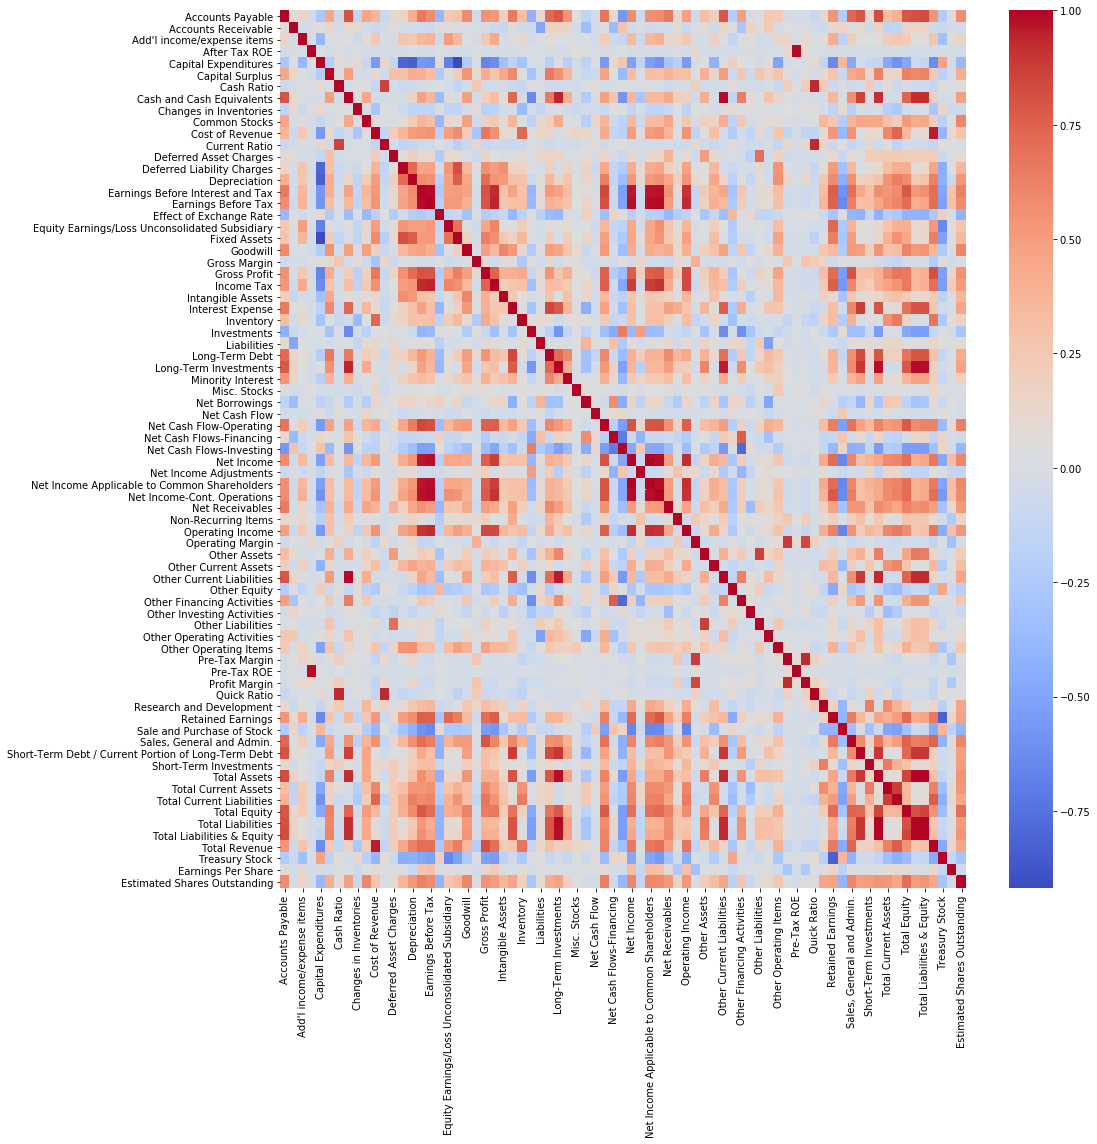

In [32]:
plt.figure(figsize=(16, 16))
sns.heatmap(fundamentals.corr(), annot=False, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [33]:
# estimated shares outstanding has no correlation with the other columns with missing values

##### USE PCA 

In [34]:
numerics = ['float64']
Fundamentals = fundamentals.select_dtypes(include=numerics)
Fundamentals.dtypes

Accounts Payable                float64
Accounts Receivable             float64
Add'l income/expense items      float64
After Tax ROE                   float64
Capital Expenditures            float64
                                 ...   
Total Liabilities & Equity      float64
Total Revenue                   float64
Treasury Stock                  float64
Earnings Per Share              float64
Estimated Shares Outstanding    float64
Length: 75, dtype: object

In [35]:
from sklearn.preprocessing import StandardScaler
features = Fundamentals.columns
# Separating out the features
x = fundamentals.loc[:, features].values
# Separating out the target
y = fundamentals.loc[:,['Ticker Symbol']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7'])

In [37]:
final = pd.concat([principalDf, fundamentals[['Ticker Symbol']]], axis = 1)

In [83]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# targets = ['AMZN', 'T', 'F']
# colors = ['r', 'g', 'b']
# for target, color in zip(targets,colors):
#     indicesToKeep = final['Ticker Symbol'] == target
#     ax.scatter(final.loc[indicesToKeep, 'principal component 1']
#                , final.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()

In [39]:
pca.explained_variance_ratio_

array([0.28483322, 0.12217432, 0.05423702, 0.05255193, 0.04540458,
       0.04013223, 0.03347293])

#### Price_split

In [40]:
price_split.head(7)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.43,125.84,122.31,126.25,2163600.00
1,2016-01-06,WLTW,125.24,119.98,119.94,125.54,2386400.00
2,2016-01-07,WLTW,116.38,114.95,114.93,119.74,2489500.00
3,2016-01-08,WLTW,115.48,116.62,113.50,117.44,2006300.00
4,2016-01-11,WLTW,117.01,114.97,114.09,117.33,1408600.00
5,2016-01-12,WLTW,115.51,115.55,114.50,116.06,1098000.00
6,2016-01-13,WLTW,116.46,112.85,112.59,117.07,949600.00


In [41]:
price_split.shape

(851264, 7)

In [42]:
# checking if date column could be made into an index
price_split["date"].nunique()
# turns out we're told "no" :(

1762

In [43]:
# lets look at the values in "symbol"
print(price_split["symbol"].unique())
print(price_split["symbol"].nunique())

['WLTW' 'A' 'AAL' 'AAP' 'AAPL' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADS' 'ADSK' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIZ' 'AJG' 'AKAM'
 'ALB' 'ALK' 'ALL' 'ALXN' 'AMAT' 'AME' 'AMG' 'AMGN' 'AMP' 'AMT' 'AMZN'
 'AN' 'ANTM' 'AON' 'APA' 'APC' 'APD' 'APH' 'ARNC' 'ATVI' 'AVB' 'AVGO'
 'AVY' 'AWK' 'AXP' 'AYI' 'AZO' 'BA' 'BAC' 'BAX' 'BBBY' 'BBT' 'BBY' 'BCR'
 'BDX' 'BEN' 'BHI' 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'C'
 'CA' 'CAG' 'CAH' 'CAT' 'CB' 'CBG' 'CBS' 'CCI' 'CCL' 'CELG' 'CERN' 'CF'
 'CHD' 'CHK' 'CHRW' 'CI' 'CINF' 'CL' 'CLX' 'CMA' 'CMCSA' 'CME' 'CMG' 'CMI'
 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COH' 'COL' 'COO' 'COP' 'COST' 'CPB' 'CRM'
 'CSCO' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'CXO' 'D' 'DAL' 'DD'
 'DE' 'DFS' 'DG' 'DGX' 'DHI' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DLR' 'DLTR'
 'DNB' 'DOV' 'DOW' 'DPS' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN' 'EA' 'EBAY' 'ECL'
 'ED' 'EFX' 'EIX' 'EL' 'EMN' 'EMR' 'ENDP' 'EOG' 'EQIX' 'EQR' 'EQT' 'ES'
 'ESRX' 'ESS' 'ETFC' 'ETN' 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE

In [44]:
price_split.describe()

,open,close,low,high,volume
count,851264.00,851264.00,851264.00,851264.00,851264.00
mean,64.99,65.01,64.34,65.64,5415112.64
std,75.20,75.20,74.46,75.91,12494681.43
min,1.66,1.59,1.50,1.81,0.00
25%,31.27,31.29,30.94,31.62,1221500.00
50%,48.46,48.48,47.97,48.96,2476250.00
75%,75.12,75.14,74.40,75.85,5222500.00
max,1584.44,1578.13,1549.94,1600.93,859643400.00


In [45]:
# checking datatype of date column
type(price_split.date[0])
# returns str, we have to change this to datetime

str

In [46]:
from datetime import datetime
pd.to_datetime(price_split['date'])

0        2016-01-05
1        2016-01-06
2        2016-01-07
3        2016-01-08
4        2016-01-11
            ...    
851259   2016-12-30
851260   2016-12-30
851261   2016-12-30
851262   2016-12-30
851263   2016-12-30
Name: date, Length: 851264, dtype: datetime64[ns]

In [47]:
price_split.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [48]:
price_split= (price_split.merge(securities, left_on='symbol', right_on='Ticker symbol')
          .reindex(columns=['date','symbol', 'Security','open', 'close', 'low', 'high', 'volume']))

In [49]:
price_split.head()

,date,symbol,Security,open,close,low,high,volume
0,2016-01-05,WLTW,Willis Towers Watson,123.43,125.84,122.31,126.25,2163600.00
1,2016-01-06,WLTW,Willis Towers Watson,125.24,119.98,119.94,125.54,2386400.00
2,2016-01-07,WLTW,Willis Towers Watson,116.38,114.95,114.93,119.74,2489500.00
3,2016-01-08,WLTW,Willis Towers Watson,115.48,116.62,113.50,117.44,2006300.00
4,2016-01-11,WLTW,Willis Towers Watson,117.01,114.97,114.09,117.33,1408600.00


In [50]:
price_split.shape

(851264, 8)

In [51]:
price_split_grp=price_split.groupby(price_split.Security)

In [52]:
print(price_split_grp["Security"].unique())

Security
3M Company                            [3M Company]
AES Corp                                [AES Corp]
AFLAC Inc                              [AFLAC Inc]
AMETEK Inc                            [AMETEK Inc]
AT&T Inc                                [AT&T Inc]
                                    ...           
Yum! Brands Inc                  [Yum! Brands Inc]
Zimmer Biomet Holdings    [Zimmer Biomet Holdings]
Zions Bancorp                      [Zions Bancorp]
Zoetis                                    [Zoetis]
eBay Inc.                              [eBay Inc.]
Name: Security, Length: 501, dtype: object


In [53]:
ATnT=price_split_grp.get_group("AT&T Inc")  # phone services
Ford=price_split_grp.get_group("Ford Motor") # automobile manufacturing
Amazon=price_split_grp.get_group("Amazon.com Inc") # e-commerce
CocaCola=price_split_grp.get_group("Coca Cola Company") # product commodity

In [54]:
ATnT.head()

,date,symbol,Security,open,close,low,high,volume
699765,2010-01-04,T,AT&T Inc,28.41,28.58,28.28,28.61,29136600.00
699766,2010-01-05,T,AT&T Inc,28.70,28.44,28.35,28.73,35234500.00
699767,2010-01-06,T,AT&T Inc,27.95,27.61,27.55,28.03,37894600.00
699768,2010-01-07,T,AT&T Inc,27.58,27.30,27.12,27.69,33600300.00
699769,2010-01-08,T,AT&T Inc,27.29,27.10,26.88,27.39,27633400.00


In [55]:
Amazon.head()
# ATnT.set_index("date",inplace=True)
# Amazon.set_index("date",inplace=True)
# Ford.set_index("date",inplace=True)
# CocaCola.set_index("date",inplace=True)

,date,symbol,Security,open,close,low,high,volume
58397,2010-01-04,AMZN,Amazon.com Inc,136.25,133.90,133.14,136.61,7599900.00
58398,2010-01-05,AMZN,Amazon.com Inc,133.43,134.69,131.81,135.48,8851900.00
58399,2010-01-06,AMZN,Amazon.com Inc,134.60,132.25,131.65,134.73,7178800.00
58400,2010-01-07,AMZN,Amazon.com Inc,132.01,130.00,128.80,132.32,11030200.00
58401,2010-01-08,AMZN,Amazon.com Inc,130.56,133.52,129.03,133.68,9830500.00


In [56]:
Ford.head()

,date,symbol,Security,open,close,low,high,volume
285695,2010-01-04,F,Ford Motor,10.17,10.28,10.05,10.28,60855800.00
285696,2010-01-05,F,Ford Motor,10.45,10.96,10.40,11.24,215620200.00
285697,2010-01-06,F,Ford Motor,11.21,11.37,11.13,11.46,200070600.00
285698,2010-01-07,F,Ford Motor,11.46,11.66,11.32,11.69,130201700.00
285699,2010-01-08,F,Ford Motor,11.67,11.69,11.46,11.74,130463000.00


In [57]:
CocaCola.head()

,date,symbol,Security,open,close,low,high,volume
433703,2010-01-04,KO,Coca Cola Company,28.58,28.52,28.45,28.61,13870400.00
433704,2010-01-05,KO,Coca Cola Company,28.42,28.17,28.07,28.50,23172400.00
433705,2010-01-06,KO,Coca Cola Company,28.17,28.17,27.99,28.22,19264600.00
433706,2010-01-07,KO,Coca Cola Company,28.17,28.09,27.88,28.18,13234600.00
433707,2010-01-08,KO,Coca Cola Company,27.73,27.58,27.38,27.82,28712400.00


In [58]:
cocaCola=CocaCola.set_index(["date"])
aTnT=ATnT.set_index(["date"])
amazon=Amazon.set_index(["date"])
ford= Ford.set_index(["date"])

In [59]:
cocaCola.index = pd.to_datetime(cocaCola.index)
aTnT.index = pd.to_datetime(aTnT.index)
amazon.index = pd.to_datetime(amazon.index)
ford.index = pd.to_datetime(ford.index)

In [60]:
cocaCola.close.resample("M").mean()# monthly resampled data for closing points
aTnT.close.resample("M").mean()
amazon.close.resample("M").mean()
ford.close.resample("M").mean()

date
2010-01-31   11.37
2010-02-28   11.32
2010-03-31   13.25
2010-04-30   13.34
2010-05-31   11.88
              ... 
2016-08-31   12.33
2016-09-30   12.26
2016-10-31   12.01
2016-11-30   11.80
2016-12-31   12.58
Freq: M, Name: close, Length: 84, dtype: float64

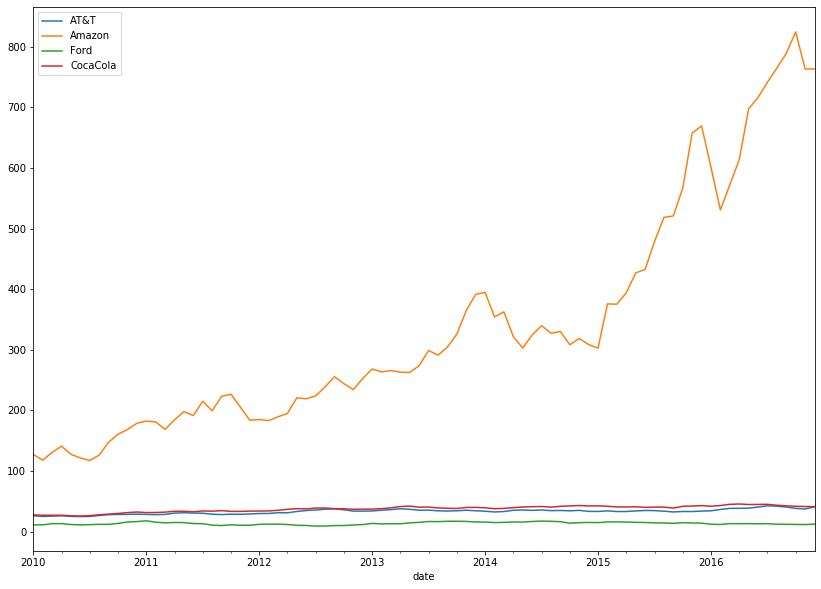

In [61]:
fig, ax = plt.subplots(figsize=(14,10))
aTnT.close.resample("M").mean().plot(label="AT&T")
amazon.close.resample("M").mean().plot(label="Amazon")
ford.close.resample("M").mean().plot(label="Ford")
cocaCola.close.resample("M").mean().plot(label="CocaCola")
plt.legend()

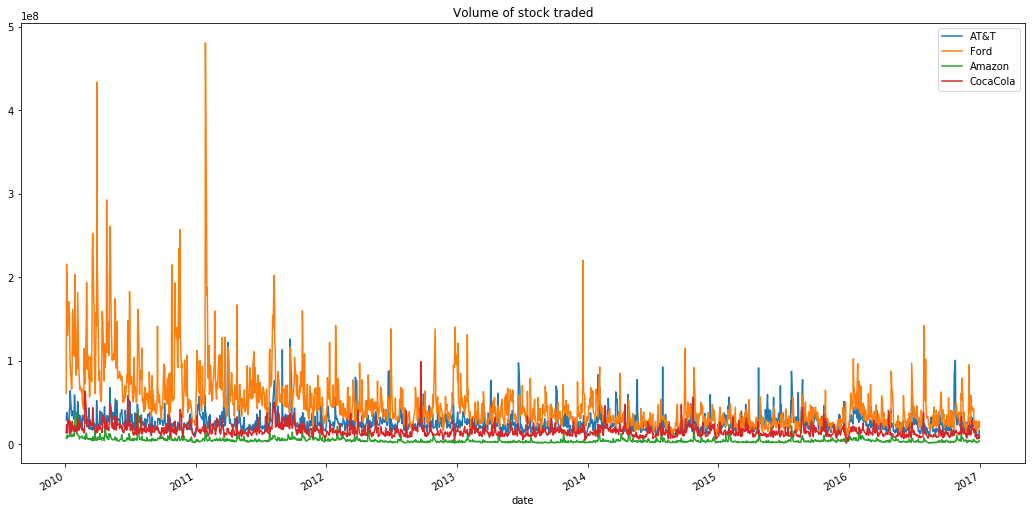

In [62]:
aTnT['volume'].plot(label = "AT&T", figsize = (18, 9))
ford['volume'].plot(label = 'Ford')
amazon['volume'].plot(label = 'Amazon')
cocaCola["volume"].plot(label="CocaCola")
plt.title('Volume of stock traded')
plt.legend()

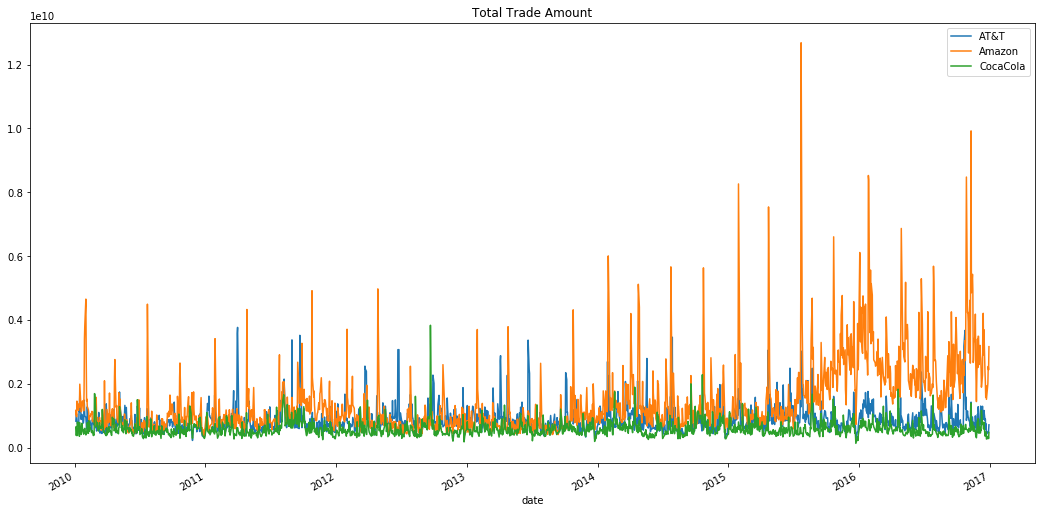

In [63]:
aTnT['TotalTrade'] = aTnT['open'] * aTnT['volume']
ford['TotalTrade']= ford['open'] * ford['volume']
amazon['TotalTrade']= amazon['open'] * amazon['volume']
cocaCola["TotalTrade"]= cocaCola["open"] * cocaCola["volume"]

aTnT['TotalTrade'].plot(label = "AT&T", figsize = (18, 9))
# Ford['TotalTrade'].plot(label = 'Ford')
amazon['TotalTrade'].plot(label = 'Amazon')
cocaCola["TotalTrade"].plot(label="CocaCola")

plt.title('Total Trade Amount')
plt.legend()

#### Amazon has an interesting trend in these years, let's look into it more

In [64]:
amazon_2012=amazon["2012-01-01":"2012-12-31"] # amazon data for 2012
amazon_2012.head()

,symbol,Security,open,close,low,high,volume,TotalTrade
date,,,,,,,,
2012-01-03,AMZN,Amazon.com Inc,175.89,179.03,175.55,179.48,5110800.00,898938606.89
2012-01-04,AMZN,Amazon.com Inc,179.21,177.51,176.07,180.50,4205200.00,753613921.44
2012-01-05,AMZN,Amazon.com Inc,175.94,177.61,174.05,178.25,3809100.00,670173061.62
2012-01-06,AMZN,Amazon.com Inc,178.07,182.61,177.50,184.65,7008400.00,1247985837.06
2012-01-09,AMZN,Amazon.com Inc,182.76,178.56,177.00,184.37,5056900.00,924199018.72


In [65]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=amazon.index,
                open=amazon['open'],
                high=amazon['high'],
                low=amazon['low'],
                close=amazon['close'])])
fig.update_layout(
    title='Amazon Stock Chart',
    yaxis_title='Amazon Stock',
)

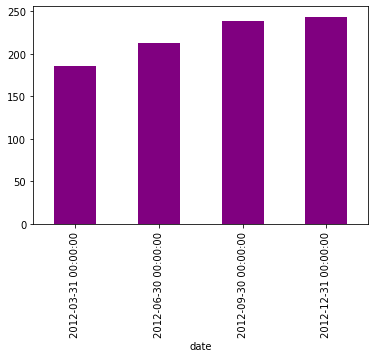

In [66]:
#amazon quawrtely results shown in plot
amazon_2012.close.resample("Q").mean().plot(kind="bar",label="Amazon",color="purple")

### Prediction for amazon's closing prices

In [67]:
Amazon[["open","low","high","volume"]].corr()

,open,low,high,volume
open,1.00,1.00,1.00,-0.24
low,1.00,1.00,1.00,-0.24
high,1.00,1.00,1.00,-0.23
volume,-0.24,-0.24,-0.23,1.00


In [68]:
Amazon.shape

(1762, 8)

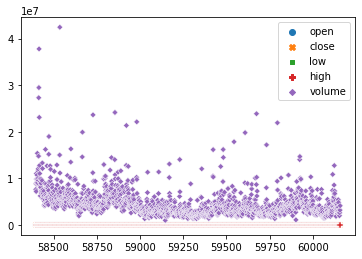

In [69]:
sns.scatterplot(data=Amazon)

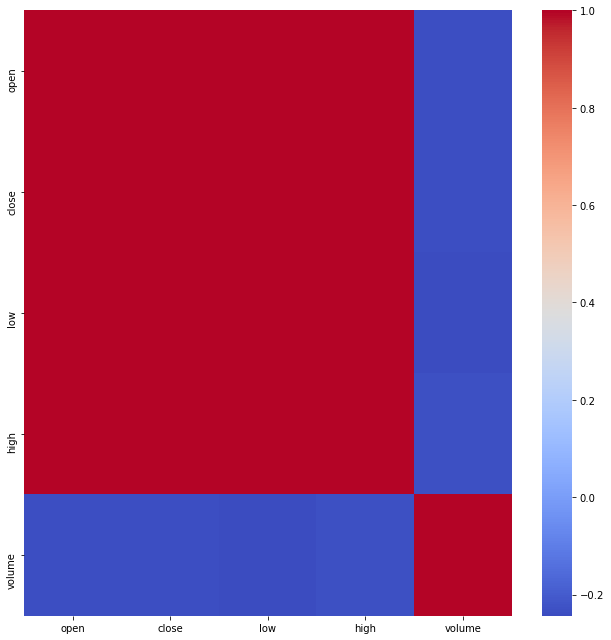

In [70]:
plt.figure(figsize=(9, 9))
sns.heatmap(Amazon.corr(), annot=False, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [79]:
numerics = ['float64']
Amazon = Amazon.select_dtypes(include=numerics)
Amazon.dtypes

open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

In [80]:
features = Amazon.columns
# Separating out the features
x = Amazon.loc[:, features].values
# Separating out the target
y = Amazon.loc[:,['close']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [84]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2','pc3','pc4'])
pca.explained_variance_ratio_

array([8.14642447e-01, 1.85227768e-01, 8.53786485e-05, 3.53779313e-05])

### Securities dataset

In [ ]:
securities.head(10)
# map to show headquarters of places
# Sectors segmentation

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877
5,AYI,Acuity Brands Inc,reports,Industrials,Electrical Components & Equipment,"Atlanta, Georgia",2016-05-03,1144215
6,ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343
7,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449
8,AES,AES Corp,reports,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",NaN,874761
9,AET,Aetna Inc,reports,Health Care,Managed Health Care,"Hartford, Connecticut",1976-06-30,1122304


In [ ]:
print(securities["SEC filings"].unique())

['reports']


In [ ]:
# since there are no other distinct value in SEC filings
securities=securities.drop(["SEC filings"],axis=1)

In [ ]:
print(securities["GICS Sector"].unique())
print(securities["GICS Sector"].nunique())

['Industrials' 'Health Care' 'Information Technology'
 'Consumer Discretionary' 'Utilities' 'Financials' 'Materials'
 'Consumer Staples' 'Real Estate' 'Energy' 'Telecommunications Services']
11


In [ ]:
securities.isna().sum()

Ticker symbol                0
Security                     0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [ ]:
securities.shape

(505, 7)

In [ ]:
# the date first added has too many null values, so it's best to drop it
securities=securities.drop(["Date first added"],axis=1)

In [ ]:
# the CIK digits wouldnt be used further in our analysis, we can drop it
securities=securities.drop(["CIK"],axis=1)

In [ ]:
securities.head()

,Ticker symbol,Security,GICS Sector,GICS Sub Industry,Address of Headquarters
0,MMM,3M Company,Industrials,Industrial Conglomerates,"St. Paul, Minnesota"
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois"
2,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois"
3,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,"Dublin, Ireland"
4,ATVI,Activision Blizzard,Information Technology,Home Entertainment Software,"Santa Monica, California"


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

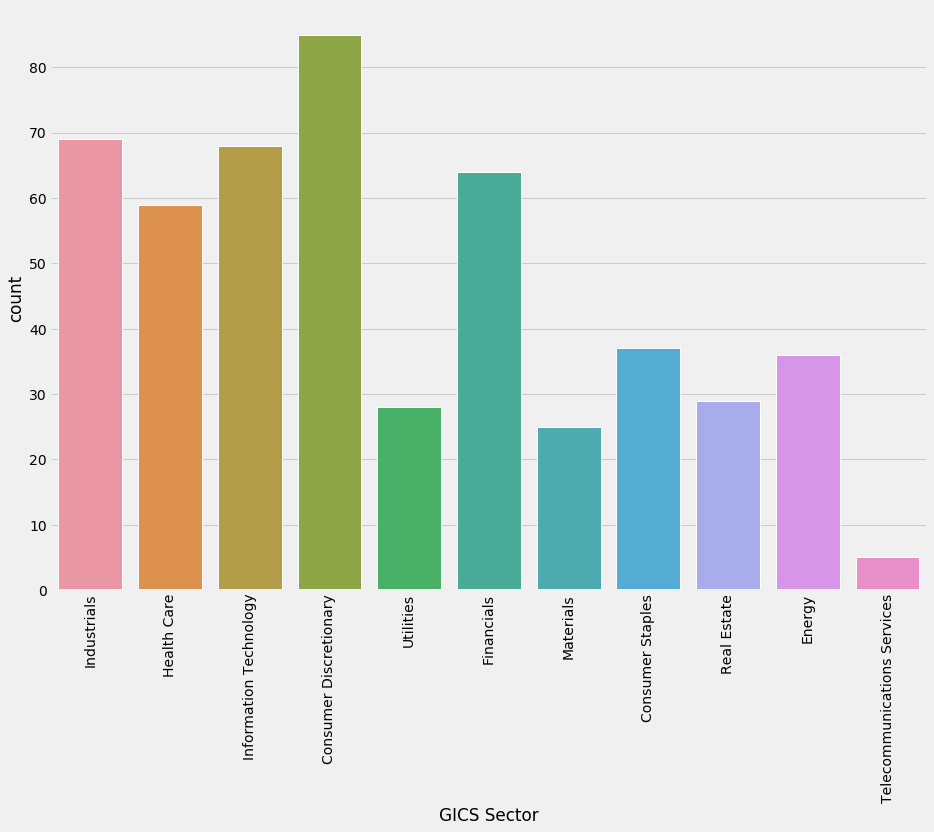

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="GICS Sector", data=securities)
plt.xticks(rotation=90)

In [ ]:
securities.dtypes

Ticker symbol              object
Security                   object
GICS Sector                object
GICS Sub Industry          object
Address of Headquarters    object
dtype: object

In [ ]:
securities['Address of Headquarters'] = securities['Address of Headquarters'].str.split(',').str[0]

In [ ]:
securities['Address of Headquarters'].head()

0         St. Paul
1    North Chicago
2    North Chicago
3           Dublin
4     Santa Monica
Name: Address of Headquarters, dtype: object

In [ ]:
print(securities["GICS Sub Industry"].unique())
print(securities["GICS Sub Industry"].nunique())

['Industrial Conglomerates' 'Health Care Equipment' 'Pharmaceuticals'
 'IT Consulting & Other Services' 'Home Entertainment Software'
 'Electrical Components & Equipment' 'Application Software'
 'Automotive Retail' 'Independent Power Producers & Energy Traders'
 'Managed Health Care' 'Asset Management & Custody Banks'
 'Life & Health Insurance' 'Industrial Gases'
 'Internet Software & Services' 'Airlines' 'Specialty Chemicals'
 'Biotechnology' 'Building Products'
 'Data Processing & Outsourced Services' 'Electric Utilities'
 'Property & Casualty Insurance' 'Tobacco'
 'Internet & Direct Marketing Retail' 'MultiUtilities' 'Consumer Finance'
 'Specialized REITs' 'Water Utilities' 'Health Care Distributors'
 'Electronic Components' 'Oil & Gas Exploration & Production'
 'Semiconductors' 'Insurance Brokers' 'REITs' 'Computer Hardware'
 'Semiconductor Equipment' 'Agricultural Products' 'Aerospace & Defense'
 'Multi-line Insurance' 'Integrated Telecommunications Services'
 'Specialty Stores' '

In [ ]:
# pip install geopandas

### downloaded another csv containing coordinates of world cities to create a map for headquarter locations

In [ ]:
coordinates=pd.read_csv("worldcities.csv")

Data downloaded from simplemaps.com </p>
License : Creative Commons Attribution 4.0

In [ ]:
coordinates.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.68,139.77,Japan,JP,JPN,Tōkyō,primary,39105000.00,1392685764
1,Jakarta,Jakarta,-6.21,106.85,Indonesia,ID,IDN,Jakarta,primary,35362000.00,1360771077
2,Delhi,Delhi,28.67,77.22,India,IN,IND,Delhi,admin,31870000.00,1356872604
3,Manila,Manila,14.60,120.98,Philippines,PH,PHL,Manila,primary,23971000.00,1608618140
4,São Paulo,Sao Paulo,-23.55,-46.63,Brazil,BR,BRA,São Paulo,admin,22495000.00,1076532519


In [ ]:
map = (securities.merge(coordinates, left_on='Address of Headquarters', right_on='city')
          .reindex(columns=['Address of Headquarters', 'lng', 'lat']))

In [ ]:
map

,Address of Headquarters,lng,lat
0,St. Paul,-93.10,44.95
1,St. Paul,-111.30,53.99
2,St. Paul,-93.10,44.95
3,St. Paul,-111.30,53.99
4,St. Paul,-93.10,44.95
...,...,...,...
1262,Las Vegas,-105.22,35.60
1263,White Plains,-73.75,41.02
1264,Warsaw,21.01,52.23
1265,Warsaw,-85.85,41.24


In [ ]:
map.drop_duplicates(subset ="Address of Headquarters",
                     keep = False, inplace = True)
map.head()
map.shape

(78, 3)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


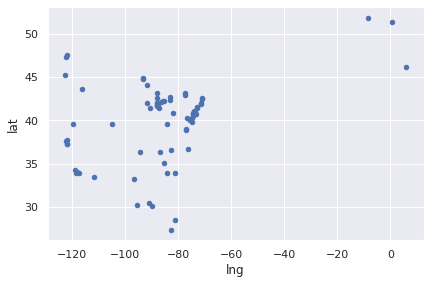

In [ ]:
map.plot(x="lng", y="lat", kind="scatter",colormap="YlOrRd")

In [ ]:
import geopandas as gpd


In [ ]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.00,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.00,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.00,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.00,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.00,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


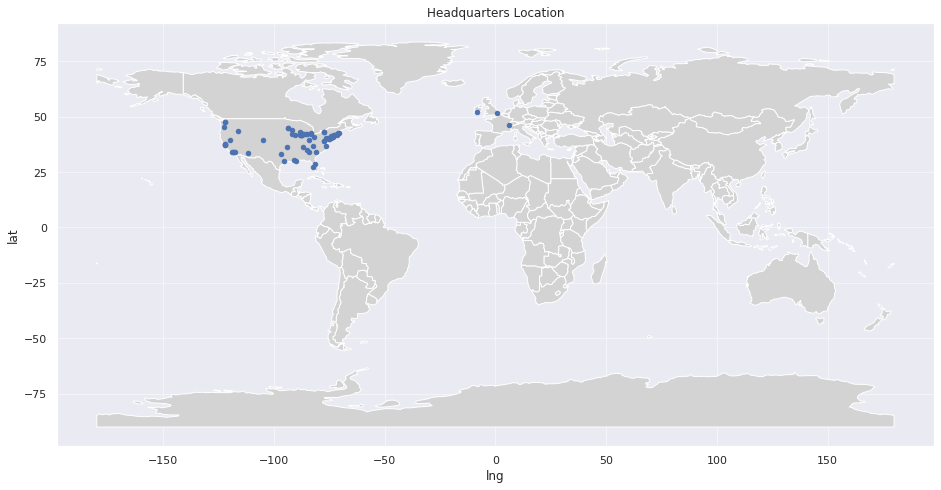

In [ ]:
# initialize an axis
fig, ax = plt.subplots(figsize=(14,10))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey",ax=ax)

# plot points
map.plot(x="lng", y="lat", kind="scatter", colormap="YlOrRd", title="Headquarters Location", ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()